# 8.5 LLE

局部线性嵌入(LLE)是另一种强大的非线性降维(NLDR)技术，**是一种流形学习技术，不像以前的算法那样依赖于投影。** LLE的工作原理是首先测量每个训练实例如何与最近的邻居(c.n.)线性相关，然后寻找可以最好地保留这些局部关系的训练集的低维表示形式。**这种方法特别适合于展开扭曲的流行，尤其是没有太多噪声的情况下**。

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.02, random_state=41)

In [3]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

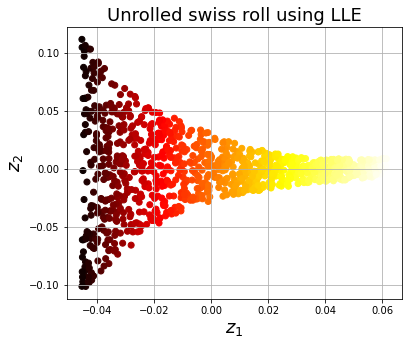

In [4]:
plt.figure(figsize=(6, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t , cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.title("Unrolled swiss roll using LLE", fontsize=18)
plt.grid(True)

plt.show()

LLE的工作方式如下：对于每个训练实例$x^{(i)}$，算法都会识别出其k个最近的邻居（上面的代码k=10），然后尝试将$x^{(i)}$重构为这些邻居的线性函数。更具体地说，它找到权重$w_{i,j}$,使得$x^{(i)}$与$\sum_{j=1}^m w_{i,j}x^{(j)}$之间的平方距离尽可能最小，并假设如果$x^{(j)}$不是$x^{(i)}$的k个最接近的邻居之一则$w_{i, j} = 0$。因此LLE的第一步是公式8-4描述的约束优化问题，其中$W$是包含了所有权重$w_{i,j}$的权重矩阵。第二个约束条件只是将其简单地将每个训练实例$x^{(i)}$的权重归一化。

$$
\hat{W} = \underset{W}{\argmin}\sum_{i=1}^m(x^{(i)} - \sum_{j=1}^m w_{i,j}x^{(j)})^2 \\ \text{满足} \begin{cases} w_{i,j} = 0 & x^{(j)}\text{不属于}x^{(i)}\text{的k c.n.} \\ \sum_{j=1}^m w_{i, j}=1 & \text{其中}i=1,2,\cdots, m\end{cases} \tag{公式8-4：LLE第一步：局部关系线性建模}
$$

在此步骤之后，权重矩阵$\hat{W}$（包含权重$\hat{w}_{i,j}$）对训练实例之间的局部线性关系进行编码。第二步是将训练实例映射到d维空间（其中d<n），同时尽可能保留这些局部关系。如果$z^{(i)}$是次d维空间中的$x^{(i)}$的图像，则我们希望$z^{(i)}$与$\sum_{j=1}^m \hat{w}_{i,j}z^{(j)}$之间的平方距离尽可能小。

这种想法导致了公式8-5中描述的无约束优化问题。它看起来与第一步非常相似，但是我们没有保持实例固定并找到最佳权重，而是相反：保持权重固定并找到实例图像在低维空间中的最佳位置。注意$Z$是包含所有$z^{(i)}$的矩阵。

$$
\hat{Z} = \underset{Z}{\argmin}\sum_{i=1}^m(z^{(i)}-\sum_{j=1}^m\hat{w}_{i,j}z^{(j)})^2 \tag{公式8-5：LLE第二步：在保持关系的同时减少维度}
$$

Scikit-Learn的LLE实现具有以下计算复杂度：$O(m \log(m) n\log(k))$用于找到k个最近的邻居，$O(mnk^3)$用于优化权重，$O(dm^2)$用于构造低维表示。不幸的是，最后一项中的$m^2$使该算法很难扩展到非常大的数据集。